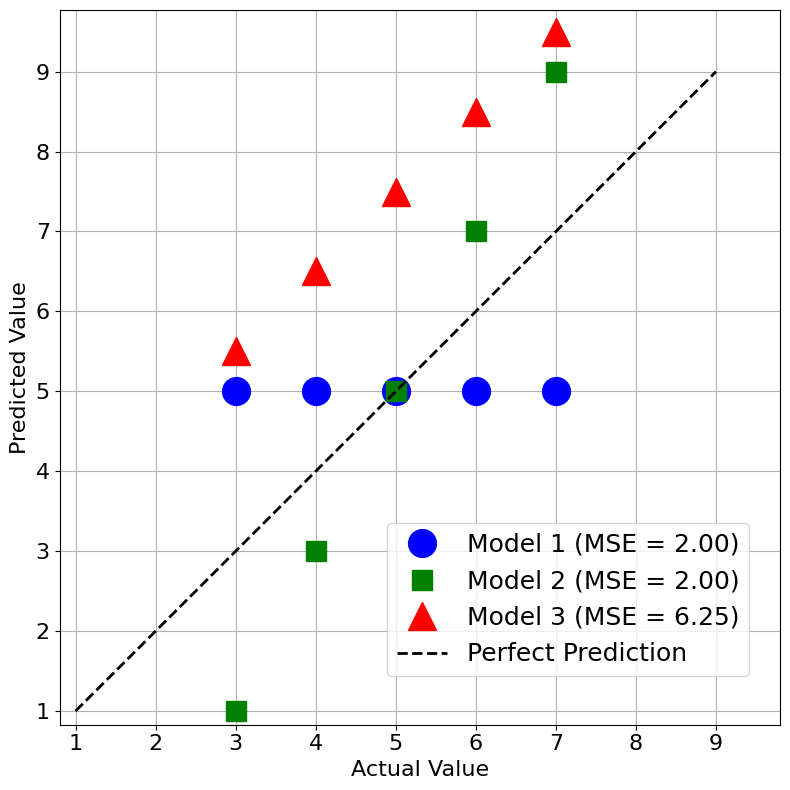

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Data
actual = np.array([3, 4, 5, 6, 7])
model1 = np.array([5, 5, 5, 5, 5])
model2 = np.array([1, 3, 5, 7, 9])
model3 = np.array([5.5, 6.5, 7.5, 8.5, 9.5])
perfect = np.array([3, 4, 5, 6, 7])

# MSE calculations
mse1 = mean_squared_error(actual, model1)
mse2 = mean_squared_error(actual, model2)
mse3 = mean_squared_error(actual, model3)

# Plot
plt.figure(figsize=(8, 8))  # Use equal width and height for square figure
plt.plot(actual, model1, 'o', color='blue', markersize=20, label=f'Model 1 (MSE = {mse1:.2f})')
plt.plot(actual, model2, 's', color='green', markersize=15, label=f'Model 2 (MSE = {mse2:.2f})')
plt.plot(actual, model3, '^', color='red', markersize=20, label=f'Model 3 (MSE = {mse3:.2f})')

# Create extended diagonal line from (1,1) to (9,9)
diagonal_x = np.array([1, 9])
diagonal_y = np.array([1, 9])
plt.plot(diagonal_x, diagonal_y, 'k--', linewidth=2, label='Perfect Prediction')  # Increased line width

# Set equal aspect ratio to make cells square
plt.axis('equal')

# Set the limits to show the extended diagonal
plt.xlim(0.8, 9.8)
plt.ylim(0.8, 9.8)

# Rest of the plotting code
plt.xlabel('Actual Value', fontsize=16)
plt.ylabel('Predicted Value', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18, loc='lower right', bbox_to_anchor=(0.975, 0.05))
plt.grid(True)
plt.tight_layout()

# Save as SVG
plt.savefig("actual_vs_predicted_mse_plot_font16.svg", format='svg')
plt.show()


In [16]:
# Recreate both plots with no title, larger axis labels, and adjusted legend font size

# Define the alpha_e vs metric data
alpha_e_values_corrected = [0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 1.0]
aore_values_alphae = [0.3391, 0.3341, 0.3589, 0.3450, 0.3557, 0.3515, 0.3547, 0.3543, 0.3557, 0.3586, 0.3570, 0.3592, 0.3607]
aorc_values_alphae = [0.4483, 0.4575, 0.4131, 0.4682, 0.4566, 0.4777, 0.4774, 0.4735, 0.4651, 0.4733, 0.4770, 0.4730, 0.4695]

# Plot alpha_e vs AORE/AORC (no legend on this plot)
plt.figure(figsize=(10, 6))
plt.plot(alpha_e_values_corrected, aore_values_alphae, marker='o', color='orange', label='AORE (↓)')
plt.plot(alpha_e_values_corrected, aorc_values_alphae, marker='o', color='blue', label='AORC (↑)')
plt.xlabel(r'$\alpha_e$', fontsize=26)
plt.ylabel('Metric Value', fontsize=23)
plt.grid(True)
plt.tight_layout()
alphae_path_nolegend = "aore_aorc_vs_alphae_cleaned.svg"
plt.savefig(alphae_path_nolegend, format='svg')
plt.close()

# Lambda values and metrics
lambda_values_trimmed = [0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
aore_values_trimmed = [0.3391, 0.3237, 0.3125, 0.3160, 0.3228, 0.3262, 0.3339]
aorc_values_trimmed = [0.4483, 0.4776, 0.4884, 0.4896, 0.4793, 0.4838, 0.4709]

# Plot lambda vs AORE/AORC (with legend, AORE below AORC, slightly raised)
plt.figure(figsize=(10, 6))
plt.plot(lambda_values_trimmed, aorc_values_trimmed, marker='o', color='blue', label='AORC (↑)')
plt.plot(lambda_values_trimmed, aore_values_trimmed, marker='o', color='orange', label='AORE (↓)')
plt.xlabel(r'$\lambda$', fontsize=26)
plt.ylabel('Metric Value', fontsize=23)
plt.legend(fontsize=26, loc='center', bbox_to_anchor=(0.79, 0.46))  # slightly raised from 0.42 to 0.46
plt.grid(True)
plt.tight_layout()
lambda_path_legend_adjusted = "aore_aorc_vs_lambda_cleaned.svg"
plt.savefig(lambda_path_legend_adjusted, format='svg')
plt.close()

alphae_path_nolegend, lambda_path_legend_adjusted


('aore_aorc_vs_alphae_cleaned.svg', 'aore_aorc_vs_lambda_cleaned.svg')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Alpha values
alphas = [1, 2, 4, 0.5, 0.25]
alphas_reciprocal = [0] + alphas

# Density ranges
d_rec = np.linspace(0.01, 1, 1000)  # Changed minimum density to 0.2
d_mdi = np.linspace(0, 1, 1000)

# Font sizes
legend_fontsize = 16
label_fontsize = 16

# ---------- Reciprocal Plot ----------
fig_rec, ax_rec = plt.subplots(figsize=(6, 6))
for a in alphas_reciprocal:
    if a == 0:
        rec = np.ones_like(d_rec)
    else:
        rec = (1 / d_rec) ** a
    # No normalization now, using raw reciprocal values
    label = f"α = {a}"
    if a == 1:
        label += " (inverse)"
    elif a == 0.5:
        label += " (sqrt inverse)"
    ax_rec.plot(d_rec, rec, label=label)

ax_rec.set_xlim(0.01, 1)
ax_rec.set_ylim(0.98, 2)
ax_rec.set_xlabel("d (normalized density)", fontsize=label_fontsize)
ax_rec.set_ylabel("Recip$_{\\alpha}$(d)", fontsize=label_fontsize)
ax_rec.grid(True)
ax_rec.set_aspect('equal', adjustable='box')
ax_rec.legend(fontsize=legend_fontsize)

# Save reciprocal plot
fig_rec.tight_layout()
fig_rec.savefig("reciprocal_plot_16pt.svg", format='svg')

# ---------- MDI Plot ----------
fig_mdi, ax_mdi = plt.subplots(figsize=(6, 6))
for a in alphas:
    mdi = (1 - d_mdi ** a) ** (1 / a)
    ax_mdi.plot(d_mdi, mdi, label=f"α = {a}")

ax_mdi.set_xlim(0, 1)
ax_mdi.set_ylim(0, 1)
ax_mdi.set_xlabel("d (normalized density)", fontsize=label_fontsize)
ax_mdi.set_ylabel("MDI$_{\\alpha}$(d)", fontsize=label_fontsize)
ax_mdi.grid(True)
ax_mdi.set_aspect('equal', adjustable='box')
ax_mdi.legend(fontsize=legend_fontsize)

# Save MDI plot
fig_mdi.tight_layout()
fig_mdi.savefig("mdi_plot_16pt.svg", format='svg')

plt.show()


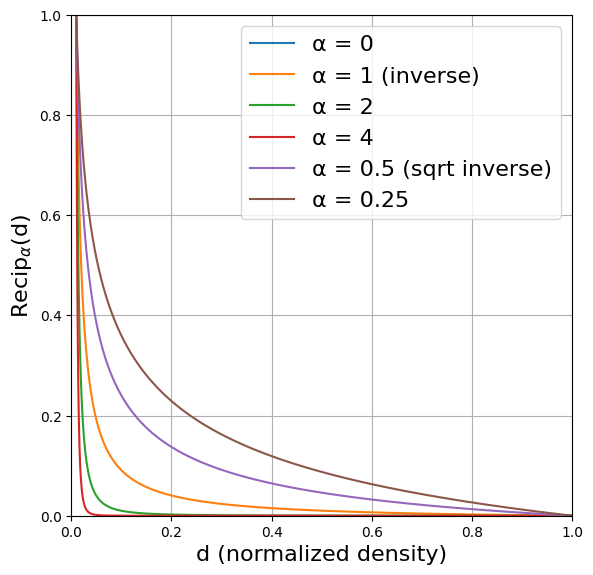

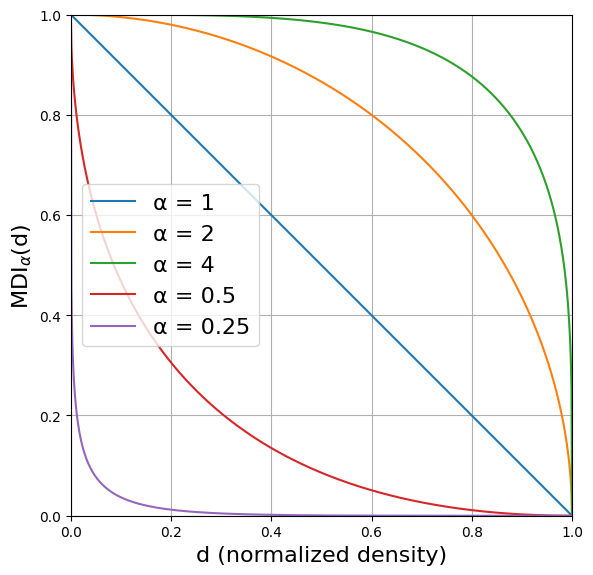

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Alpha values
alphas = [1, 2, 4, 0.5, 0.25]
alphas_reciprocal = [0] + alphas

# Density ranges
d_rec = np.linspace(0.01, 1, 1000)
d_mdi = np.linspace(0, 1, 1000)

# Font sizes
legend_fontsize = 16
label_fontsize = 16

# ---------- Reciprocal Plot ----------
fig_rec, ax_rec = plt.subplots(figsize=(6, 6))
for a in alphas_reciprocal:
    if a == 0:
        rec = np.ones_like(d_rec)
    else:
        rec = (1 / d_rec) ** a
    # Normalize to [0,1]
    if rec.max() != rec.min():
        rec_norm = (rec - rec.min()) / (rec.max() - rec.min())
    else:
        rec_norm = rec

    label = f"α = {a}"
    if a == 1:
        label += " (inverse)"
    elif a == 0.5:
        label += " (sqrt inverse)"
    ax_rec.plot(d_rec, rec_norm, label=label)

ax_rec.set_xlim(0, 1)
ax_rec.set_ylim(0, 1)
ax_rec.set_xlabel("d (normalized density)", fontsize=label_fontsize)
ax_rec.set_ylabel("Recip$_{\\alpha}$(d)", fontsize=label_fontsize)
ax_rec.grid(True)
ax_rec.set_aspect('equal', adjustable='box')
ax_rec.legend(fontsize=legend_fontsize)

# Save reciprocal plot
fig_rec.tight_layout()
fig_rec.savefig("reciprocal_plot_16pt.svg", format='svg')

# ---------- MDI Plot ----------
fig_mdi, ax_mdi = plt.subplots(figsize=(6, 6))
for a in alphas:
    mdi = (1 - d_mdi ** a) ** (1 / a)
    ax_mdi.plot(d_mdi, mdi, label=f"α = {a}")

ax_mdi.set_xlim(0, 1)
ax_mdi.set_ylim(0, 1)
ax_mdi.set_xlabel("d (normalized density)", fontsize=label_fontsize)
ax_mdi.set_ylabel("MDI$_{\\alpha}$(d)", fontsize=label_fontsize)
ax_mdi.grid(True)
ax_mdi.set_aspect('equal', adjustable='box')
ax_mdi.legend(fontsize=legend_fontsize)

# Save MDI plot
fig_mdi.tight_layout()
fig_mdi.savefig("mdi_plot_16pt.svg", format='svg')

plt.show()
